In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6938,5996-EBTKM,Female,0,Yes,Yes,67,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),69.90,4615.9,No
4979,9593-CVZKR,Female,0,Yes,Yes,56,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.45,1385.85,No
2846,0541-FITGH,Female,0,Yes,No,2,Yes,No,DSL,Yes,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,62.15,113.1,No
3044,5692-FPTAH,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,45.40,45.4,Yes
1755,1803-BGNBD,Female,0,No,No,12,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,54.30,654.5,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values #its string convert it into float

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [11]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Yash Gore\AppData\Local\Temp\ipykernel_24376\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

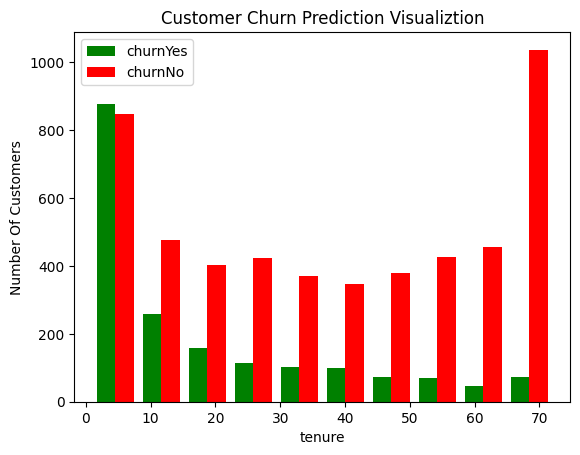

In [14]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['churnYes','churnNo'])
plt.legend()

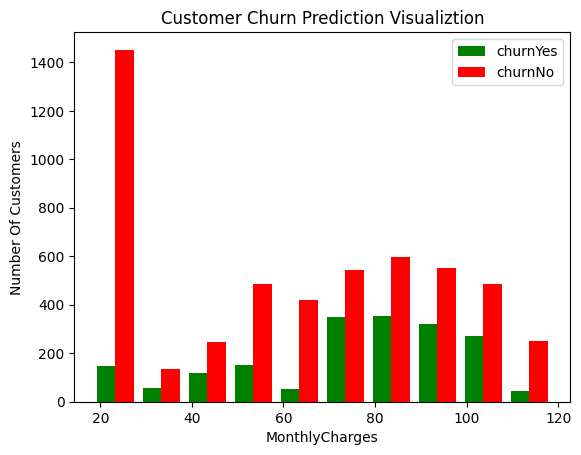

In [15]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['churnYes','churnNo'])
plt.legend()

In [16]:
def print_value_col_values(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column} : {df[column].unique()}')

In [17]:
print_value_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Yash Gore\AppData\Local\Temp\ipykernel_24376\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Yash Gore\AppData\Local\Temp\ipykernel_24376\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [19]:
print_value_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [20]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Yash Gore\AppData\Local\Temp\ipykernel_24376\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [21]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [22]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\Yash Gore\AppData\Local\Temp\ipykernel_24376\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [24]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [25]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6977,0,0,0,0,24,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
959,1,0,1,1,32,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
684,1,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
523,1,0,0,0,23,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [26]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [27]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2100,0,0,1,0,0.957746,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
667,0,0,0,0,0.676056,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
2583,1,1,0,0,0.788732,1,0,1,0,1,...,1,0,0,0,0,1,1,0,0,0
1055,1,0,0,0,0.492958,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [28]:
for col in df2:
    print(f'{col}: {df2[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [29]:
x = df2.drop('Churn',axis = 1)
y = df2['Churn']

In [30]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [31]:
x_train.shape

(5625, 26)

In [32]:
x_test.shape

(1407, 26)

In [33]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=200)

Epoch 1/200
176/176 [==============================] - 1s 1ms/step - loss: 0.5053 - accuracy: 0.7582
Epoch 2/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.7938
Epoch 3/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8027
Epoch 4/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.8059
Epoch 5/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8071
Epoch 6/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8069
Epoch 7/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8085
Epoch 8/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.8091
Epoch 9/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8117
Epoch 10/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4068 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3778 - accuracy: 0.8208
Epoch 82/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3780 - accuracy: 0.8217
Epoch 83/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8215
Epoch 84/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8235
Epoch 85/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8249
Epoch 86/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3768 - accuracy: 0.8222
Epoch 87/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3763 - accuracy: 0.8226
Epoch 88/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.8219
Epoch 89/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3756 - accuracy: 0.8244
Epoch 90/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3753 - accuracy: 

176/176 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8300
Epoch 161/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8316
Epoch 162/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3644 - accuracy: 0.8304
Epoch 163/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3645 - accuracy: 0.8318
Epoch 164/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8295
Epoch 165/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3644 - accuracy: 0.8306
Epoch 166/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3646 - accuracy: 0.8302
Epoch 167/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3645 - accuracy: 0.8320
Epoch 168/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3637 - accuracy: 0.8302
Epoch 169/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3632 - a

In [34]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.7775


[0.46681132912635803, 0.7775408625602722]

In [35]:
yp = model.predict(x_test)

44/44 [==============================] - 0s 977us/step


In [36]:
yp[:5]

array([[0.26477844],
       [0.5834783 ],
       [0.00799019],
       [0.83968705],
       [0.60156226]], dtype=float32)

In [37]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [38]:
y_pred = []
for element in yp:
    if element > 0.5 :
        y_pred.append(1)
    else:
        y_pred.append(0)

In [39]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [40]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.63      0.55      0.59       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

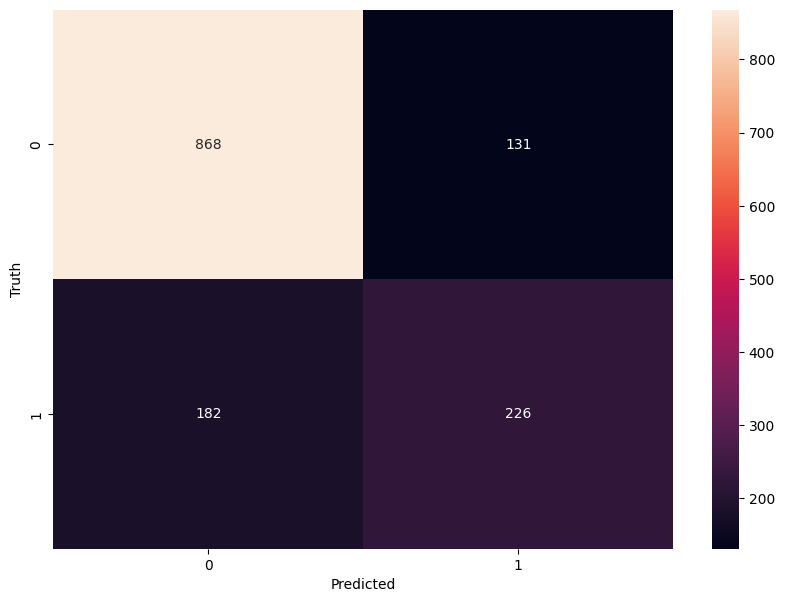

In [41]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

In [78]:
#from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
def ANN(x_train, y_train, x_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(x_train, y_train, epochs=10)
    else:
        model.fit(x_train, y_train, epochs=10, class_weight = weights)
    
    print(model.evaluate(x_test, y_test))
    
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

ValueError: Data cardinality is ambiguous:
  x sizes: 5625
  y sizes: 2990
Make sure all arrays contain the same number of samples.

# undersampling

In [79]:
#class counts
count_class_0 , count_class_1  = df2.Churn.value_counts()

#Divided by class

df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [80]:
count_class_0,count_class_1

(5163, 1869)

In [81]:
df_class_0.shape

(5163, 27)

In [82]:
df_class_1.shape

(1869, 27)

In [83]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [84]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [85]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [86]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
94/94 [==============================] - 1s 1ms/step - loss: 0.5907 - accuracy: 0.7030
Epoch 2/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5123 - accuracy: 0.7535
Epoch 3/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4942 - accuracy: 0.7625
Epoch 4/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4863 - accuracy: 0.7629
Epoch 5/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7699
Epoch 6/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4797 - accuracy: 0.7649
Epoch 7/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.7679
Epoch 8/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7746
Epoch 9/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7766
Epoch 10/10
24/24 [==============================] - 0s 1ms/step - loss: 0.4954 - accuracy: 0.7540
[0.4953579306602478

# oversampling

In [53]:
count_class_0,count_class_1

(5163, 1869)

In [54]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_class_1_over.shape

(5163, 27)

In [55]:
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)
print('random over-sampling:')
print(df_test_over.Churn.value_counts())

random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [56]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [57]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [58]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
94/94 [==============================] - 1s 1ms/step - loss: 0.6502 - accuracy: 0.6375
Epoch 2/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.7468
Epoch 3/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5126 - accuracy: 0.7572
Epoch 4/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.7629
Epoch 5/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.7642
Epoch 6/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4900 - accuracy: 0.7666
Epoch 7/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.7692
Epoch 8/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4842 - accuracy: 0.7672
Epoch 9/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7732
Epoch 10/10
24/24 [==============================] - 0s 1ms/step - loss: 0.4940 - accuracy: 0.7527
[0.4940408766269684

# method3 SMOTE

In [59]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

In [60]:
y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='all')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [63]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [64]:
y_test.value_counts()

1    374
0    374
Name: Churn, dtype: int64

In [65]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
94/94 [==============================] - 1s 1ms/step - loss: 0.6213 - accuracy: 0.6883
Epoch 2/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5257 - accuracy: 0.7498
Epoch 3/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7559
Epoch 4/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5001 - accuracy: 0.7609
Epoch 5/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4945 - accuracy: 0.7642
Epoch 6/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4913 - accuracy: 0.7612
Epoch 7/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.7659
Epoch 8/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.7645
Epoch 9/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4825 - accuracy: 0.7702
Epoch 10/10
24/24 [==============================] - 0s 1ms/step - loss: 0.4908 - accuracy: 0.7660
[0.4907702207565307

# use of Ensemble with undersampling

In [66]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [67]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

In [68]:
y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [70]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [72]:
df3 = X_train.copy()
df3['Churn']  = y_train

In [73]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [74]:
df3_class0.shape , df3_class1.shape

((1495, 27), (1495, 27))

In [76]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train = pd.concat([df3_class0,df3_class1],axis=0)
    
    X_train = df_train.drop('Churn',axis='columns')
    y_train = df_train['Churn']
    
    return X_train , y_train

In [ ]:
X_train , y_train = get_train_batch(df3_class0,df3_class1 , 0 , 1495)

In [77]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
94/94 [==============================] - 1s 1ms/step - loss: 0.6186 - accuracy: 0.6642
Epoch 2/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5112 - accuracy: 0.7572
Epoch 3/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5010 - accuracy: 0.7605
Epoch 4/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7619
Epoch 5/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7609
Epoch 6/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4923 - accuracy: 0.7629
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7635
Epoch 8/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7652
Epoch 9/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 0.7669
Epoch 10/10
24/24 [==============================] - 0s 1ms/step - loss: 0.4954 - accuracy: 0.7553
[0.4953647553920746